In [1]:
#Setup
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

os.environ['SPOTIPY_CLIENT_ID'] = '2fb4e8f10ef44df3b18f647a764c743b'
os.environ['SPOTIPY_CLIENT_SECRET'] = 'b532308437a0481b9644476bfafe44d8'

auth_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(auth_manager=auth_manager)



In [2]:
all_genre_seeds = sp.recommendation_genre_seeds()
all_genre_arr = all_genre_seeds['genres']
pop_genre_arr = []
for genre in all_genre_arr:
    if genre.find('pop') == -1:
        continue
    pop_genre_arr.append(genre)

In [3]:
#Grab name, id, and popularity data from Dance Pop genre of Spotify API and place into csv file

for genre in pop_genre_arr:
    searching = sp.search(q='genre:'+genre,type='track',limit=50)

    i=50
    data = {'ID':[],'Popularity':[], 'Duration':[]}
    df_genre = pd.DataFrame(data)

    while searching:
        for track in searching['tracks']['items']:
            if track['popularity'] == 0:    #ignore tracks that have not been listened to
                continue
            data['ID'] = track['id']
            data['Popularity'] = track['popularity']
            data['Duration'] = track['duration_ms']
            df_genre = pd.concat([pd.DataFrame(data,index=[track['name']]), df_genre])
        if searching['tracks']['next']:
            searching = sp.search(q='genre:'+genre,type='track',limit=50,offset=i)
        else:
            searching = None
        i+=50

    df_genre.to_csv(genre+'.csv')

cantopop
Mean:  39.891891891891895  Median:  39.0


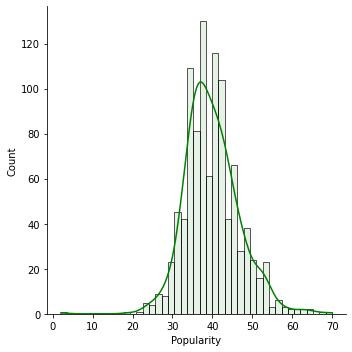

indie-pop
Mean:  62.43808532778356  Median:  62.0


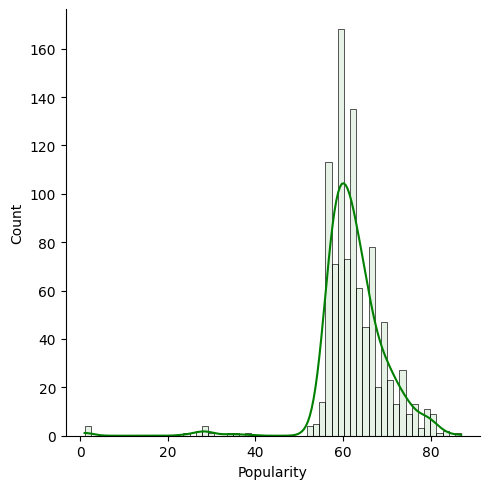

j-pop
Mean:  52.49524815205913  Median:  52.0


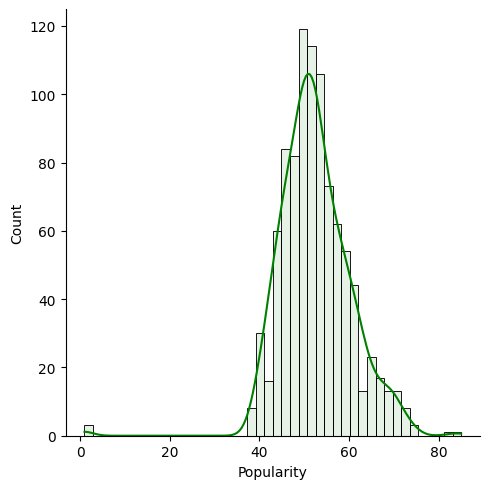

k-pop
Mean:  61.398979591836735  Median:  61.0


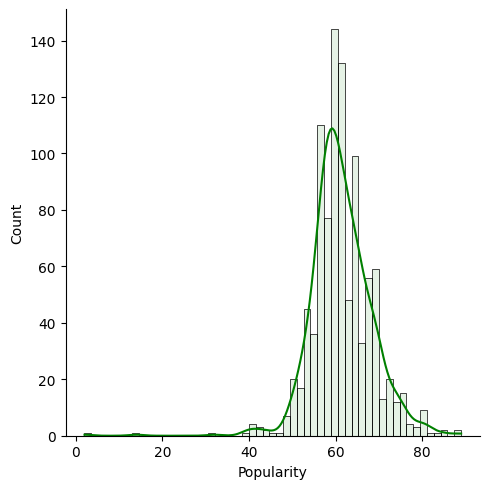

mandopop
Mean:  46.249  Median:  46.0


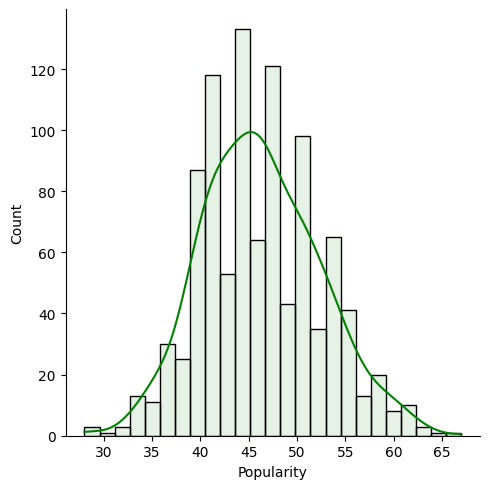

pop
Mean:  71.93980343980344  Median:  76.0


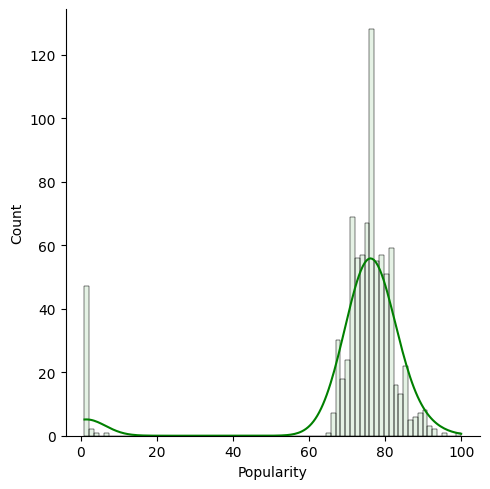

pop-film
Mean:  51.953374233128834  Median:  55.0


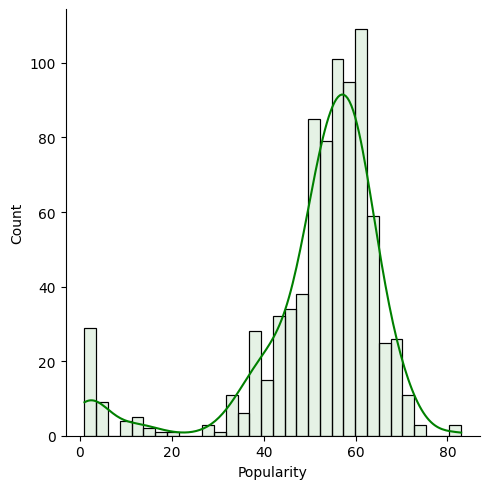

power-pop
Mean:  38.36842105263158  Median:  37.0


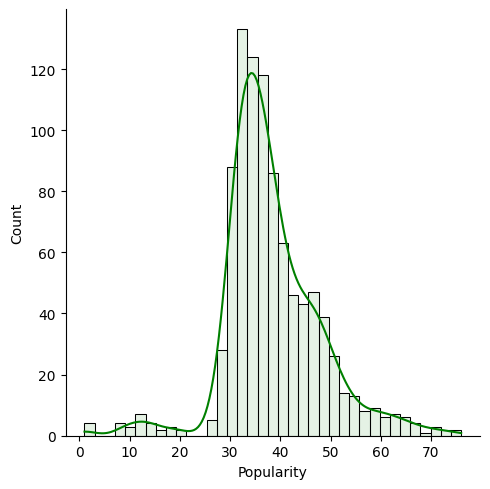

synth-pop
Mean:  45.716035634743875  Median:  44.0


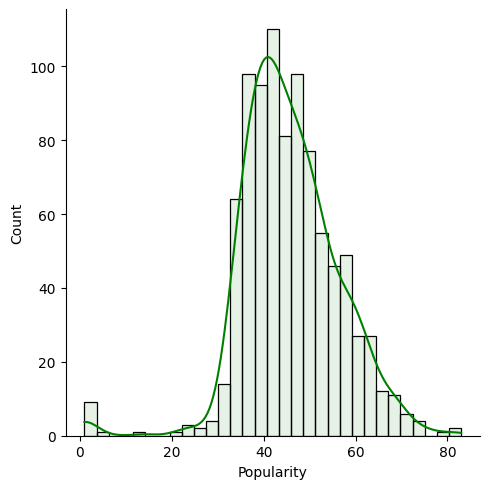

In [4]:
#Plot data from csv file
for genre in pop_genre_arr:
    csv = pd.read_csv(genre+'.csv')
    print(genre)
    print("Mean: ", csv['Popularity'].mean(), " Median: ", csv['Popularity'].median())
    sns.displot(csv['Popularity'], kde= True,alpha= 0.1, color='g')
    plt.show()


In [5]:
#Make all pop.csv file
df_all = pd.DataFrame()
for genre in pop_genre_arr:  
    df_all = pd.concat([pd.read_csv(genre+'.csv'),df_all])

df_all.to_csv('all pop.csv')

all pop
Mean:  51.935915829746534  Median:  52.0


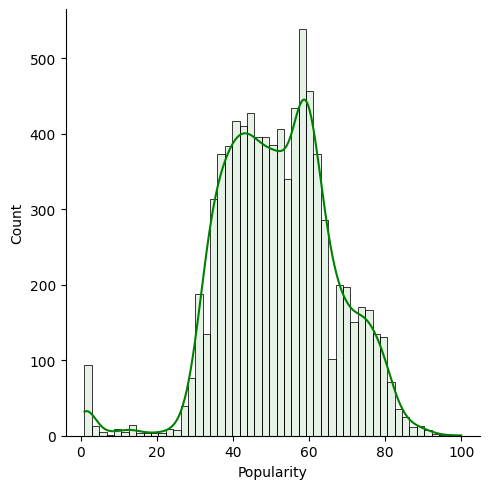

In [11]:
#Plot all pop 
csv = pd.read_csv('all pop.csv')
print('all pop')
print("Mean: ", csv['Popularity'].mean(), " Median: ", csv['Popularity'].median())
sns.displot(csv['Popularity'], kde= True,alpha= .1, color='g')
plt.show()